<a href="https://colab.research.google.com/github/Bipin-6751/Machine-Learning-Collection/blob/master/Covid_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
train_path = '/content/data_set/Train'
val_path = '/content/data_set/Validation'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image


In [9]:
model = keras.Sequential([
                          layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
                          layers.Conv2D(64, (3, 3), activation='relu'),
                          layers.MaxPooling2D(pool_size=(2,2)),
                          layers.Dropout(0.25),

                          layers.Conv2D(64, (3,3), activation='relu'),
                          layers.MaxPooling2D(pool_size=(2,2)),
                          layers.Dropout(0.25),

                          layers.Conv2D(128, (3,3), activation='relu'),
                          layers.MaxPooling2D(pool_size=(2,2)),
                          layers.Dropout(0.25),

                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),
                          layers.Dropout(0.25),
                          layers.Dense(1, activation='sigmoid'),

])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=[keras.losses.BinaryCrossentropy(from_logits=False)],
    metrics=['accuracy'],
)

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [11]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

val_datagen =  image.ImageDataGenerator(
    rescale = 1./255,
)



In [16]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 322 images belonging to 2 classes.


In [17]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [18]:
val_datagerator = val_datagen.flow_from_directory(
        val_path,
        target_size = (224, 224),
        batch_size = 32,
        class_mode = 'binary'
)

Found 70 images belonging to 2 classes.


In [19]:
his = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = val_datagerator,
    validation_steps = 2,
)

Epoch 1/10
8/8 [==============================] - 23s 1s/step - loss: 1.2373 - accuracy: 0.5575 - val_loss: 0.6838 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 0.6701 - accuracy: 0.5796 - val_loss: 0.6594 - val_accuracy: 0.7344
Epoch 3/10
8/8 [==============================] - 10s 1s/step - loss: 0.5573 - accuracy: 0.7188 - val_loss: 0.3107 - val_accuracy: 0.9531
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 0.4517 - accuracy: 0.8363 - val_loss: 0.2815 - val_accuracy: 0.9219
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.3750 - accuracy: 0.8628 - val_loss: 0.2910 - val_accuracy: 0.9531
Epoch 6/10
8/8 [==============================] - 10s 1s/step - loss: 0.3596 - accuracy: 0.8750 - val_loss: 0.1392 - val_accuracy: 0.9688
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 0.2341 - accuracy: 0.9204 - val_loss: 0.1040 - val_accuracy: 0.9844
Epoch 8/10
8/8 [======================

In [20]:
model.evaluate(train_generator)

11/11 [==============================] - 10s 870ms/step - loss: 0.2614 - accuracy: 0.9379


[0.2613796293735504, 0.9378882050514221]

In [21]:
model.evaluate(val_datagerator)

3/3 [==============================] - 2s 489ms/step - loss: 0.1335 - accuracy: 0.9571


[0.1335231065750122, 0.9571428298950195]

In [79]:
y_actual = []
y_test = []

In [80]:
import os

In [81]:
for i in os.listdir('/content/val/NORMAL'):
  img = image.load_img('/content/val/NORMAL/'+ i, target_size=(224, 224))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img, axis = 0)
  p = model.predict(img)
  if p[0,0]<0.5:
    p = 0
  else:
    p = 1
  y_test.append(p)
  y_actual.append(1)

In [84]:
y_test

[1, 1, 1, 1, 1, 1, 1, 1]

In [85]:
for i in os.listdir('/content/test'):
  img = image.load_img('/content/test/'+ i, target_size=(224, 224))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img, axis = 0)
  p = model.predict(img)
  if p[0,0]<0.5:
    p = 0
  else:
    p = 1
  y_test.append(p)
  y_actual.append(0)

In [87]:
y_test

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0]

In [73]:
from sklearn.metrics import confusion_matrix

In [88]:
cm = confusion_matrix(y_actual, y_test)

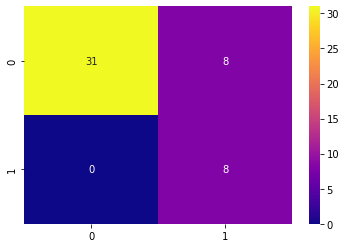

In [89]:
import seaborn as sns
sns.heatmap(cm, cmap ='plasma', annot=True)